In [1]:
from typing import Tuple

import numpy as np
import sklearn, sklearn.model_selection, sklearn.datasets
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = sklearn.datasets.fetch_california_housing(as_frame=True).frame
x_keys = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
y_key = 'MedHouseVal'
data[y_key] = data[y_key] > data[y_key].mean()

In [3]:
np.random.seed(0) # for reproducibility

a) Split the data set into training (80%) and test set (20%).  

In [4]:
df_train, df_test = sklearn.model_selection.train_test_split(data, test_size=0.2)

Implement the provided template function for fitting a model on the train set and evaluating it on the train and test sets.

In [5]:
def fit_and_evaluate_model(model) -> Tuple[float, float]:
    """Fit and evaluate a model on the training and test sets.

    Returns:
        Tuple[float, float]: The training and test error.
    """
    # Fit the model on the training set
    model.fit(df_train[x_keys], df_train[y_key])

    # Predict the labels on the training and test sets
    pred_train = model.predict(df_train[x_keys])
    pred_test = model.predict(df_test[x_keys])

    # Compute the training and test error
    train_error = (df_train[y_key] != pred_train).mean()
    test_error = (df_test[y_key] != pred_test).mean()
    return train_error, test_error

b) Train a decision tree classifier with a maximum depth of 10 on the training set. Compute the error on the train set and the error on the test set.

In [6]:
model = DecisionTreeClassifier(max_depth=10)
fit_and_evaluate_model(model)

(np.float64(0.08829941860465117), np.float64(0.15213178294573643))

c) Visualize the tree. How many nodes can it have at maximum? How many nodes does your tree have?

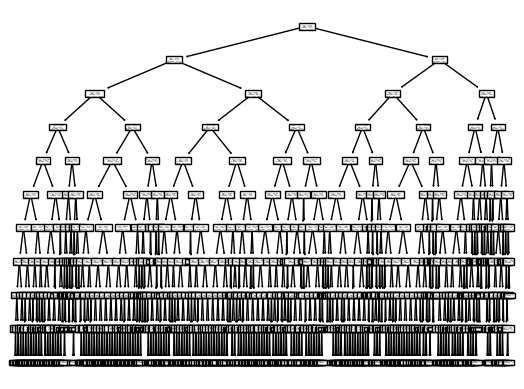

In [7]:
sklearn.tree.plot_tree(model);

*The number of nodes can grow up to $\sum_{i = 1}^{10} 2^{i-1} = 2^{10} - 1 = 1023$.*

In [9]:
print(model.tree_.node_count)

993


c) Train multiple trees with depths between 1 and 30 and visualize the training and test errors.
What do you observe?

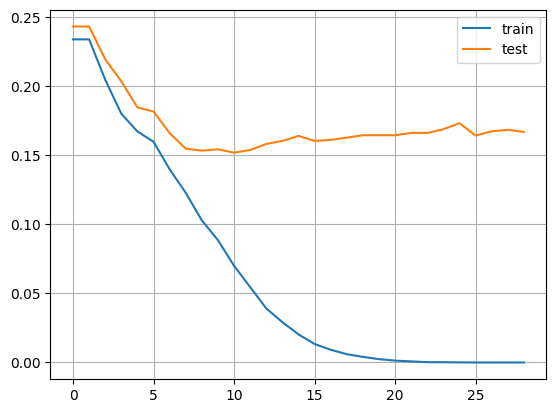

In [8]:
train_errors = []
test_errors = []

for depth in range(1, 30):
    model = DecisionTreeClassifier(max_depth=depth)
    train_error, test_error = fit_and_evaluate_model(model)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.plot(train_errors, label="train")
plt.plot(test_errors, label="test")
plt.legend()
plt.grid()

d) Train a bagging classifier with 10 trees of maximum depth 10. Compute the train and test errors.

In [9]:
model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10), n_estimators=10
)
fit_and_evaluate_model(model)

(np.float64(0.07430959302325581), np.float64(0.1298449612403101))

Train multiple bagging classifiers with 1 to 30 base estimators, each of depth 10. Visualize the curves for training and test errors.

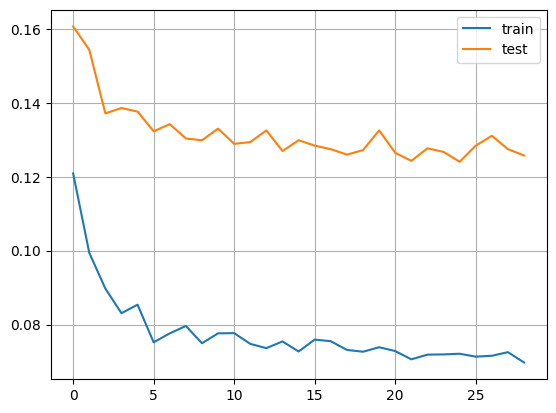

In [10]:
train_errors = []
test_errors = []

for n in range(1, 30):
    model = BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=10), n_estimators=n
    )
    train_error, test_error = fit_and_evaluate_model(model)
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(train_errors, label="train")
plt.plot(test_errors, label="test")
plt.legend()
plt.grid()

e) Train a boosting classifier (`sklearn.ensemble.AdaBoostClassifier`) with 10 trees of maximum depth 10. Compute the train and test errors.

In [11]:
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=10), n_estimators=10, algorithm="SAMME"
)
fit_and_evaluate_model(model)

(np.float64(0.009750484496124031), np.float64(0.11652131782945736))

Train multiple boosting classifiers with 1 to 30 base estimators, each of depth 5. Visualize the curves for training and test errors.

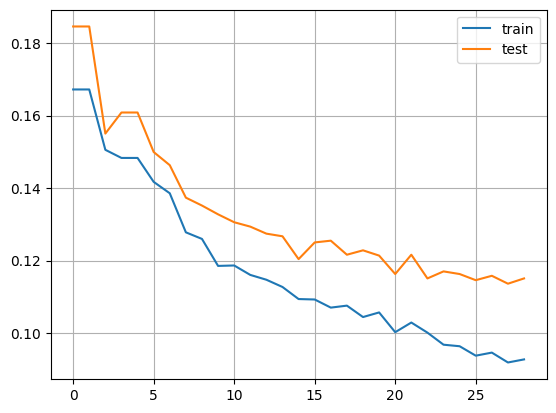

In [12]:
train_errors = []
test_errors = []

for n in range(1, 30):
    model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=5),
        n_estimators=n,
        algorithm="SAMME",
    )
    train_error, test_error = fit_and_evaluate_model(model)
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(train_errors, label="train")
plt.plot(test_errors, label="test")
plt.legend()
plt.grid()

f) Train a random forest classifier with 10 trees and max_depth=10. Compute the train and test errors.

In [13]:
model = RandomForestClassifier(n_estimators=10, max_depth=10)
fit_and_evaluate_model(model)

(np.float64(0.08823885658914729), np.float64(0.13250968992248063))

Train multiple random forests with 1 to 30 base estimators, each of depth 5. Visualize the curves for training and test errors.

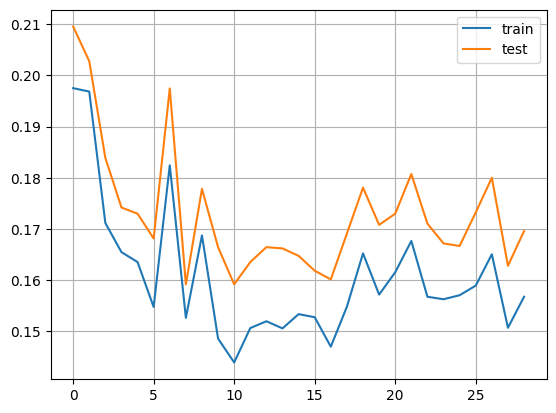

In [14]:
train_errors = []
test_errors = []

for n in range(1, 30):
    model = RandomForestClassifier(n_estimators=n, max_depth=5)
    train_error, test_error = fit_and_evaluate_model(model)
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(train_errors, label="train")
plt.plot(test_errors, label="test")
plt.legend()
plt.grid()